In [1]:
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
from OPTICS import optics
from Visualization import visualization, interactive_visualization

In [2]:
df = pd.read_csv('wine-clustering.csv')

In [3]:
#Scaling the data to bring all the attributes to a comparable level
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

#Normalizing the data so that the data approximately follows a Gaussian distribution
df_normalized = normalize(df_scaled)

In [4]:
#Converting the numpy array into a pandas DataFrame
df_normalized = pd.DataFrame(df_normalized)
#Renaming the columns
df_normalized.columns = df.columns
df_normalized.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,0.379613,-0.140548,0.058007,-0.292368,0.478426,0.202228,0.258678,-0.164873,0.306189,0.062923,0.090535,0.461931,0.253226
1,0.072771,-0.147561,-0.244647,-0.735967,0.005361,0.168017,0.216764,-0.242497,-0.160948,-0.086667,0.119975,0.328989,0.285198
2,0.059268,0.006391,0.333952,-0.080900,0.026599,0.243539,0.365922,-0.150039,0.643007,0.080985,0.095822,0.237395,0.419993
3,0.348418,-0.071435,0.100501,-0.166686,0.191747,0.513178,0.302069,-0.202243,0.212599,0.244301,-0.088064,0.243890,0.480866
4,0.110835,0.085345,0.689824,0.169399,0.480516,0.303230,0.248639,0.085008,0.150455,-0.119672,0.135752,0.168520,-0.014196


In [5]:
data_array = df_normalized.values
data_list = data_array.tolist()
X = data_list
x = data_array

In [6]:
MinPts = 15
eps = 1.6

# Run OPTICS algorithm
cluster_labels = optics(x, MinPts, eps)

# Print cluster labels
print("Cluster Labels:", cluster_labels)

Cluster Labels: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]


In [7]:
print(set(cluster_labels))
print(cluster_labels.count(1))
print(cluster_labels.count(2))
print(cluster_labels.count(3))

{1, 2, 3}
59
63
56


In [8]:
silhouette_avg_optics = silhouette_score(x, cluster_labels)
ch_index_optics = calinski_harabasz_score(data_list, cluster_labels)
db_index = davies_bouldin_score(x, cluster_labels)
print("Silhouette Score: ",silhouette_avg_optics)
print("Calinsky Harabasz Score: ",ch_index_optics)
print("Davies Bouldin Index:", db_index)

Silhouette Score:  0.26538078847946145
Calinsky Harabasz Score:  65.16213318329358
Davies Bouldin Index: 1.5255065837874777


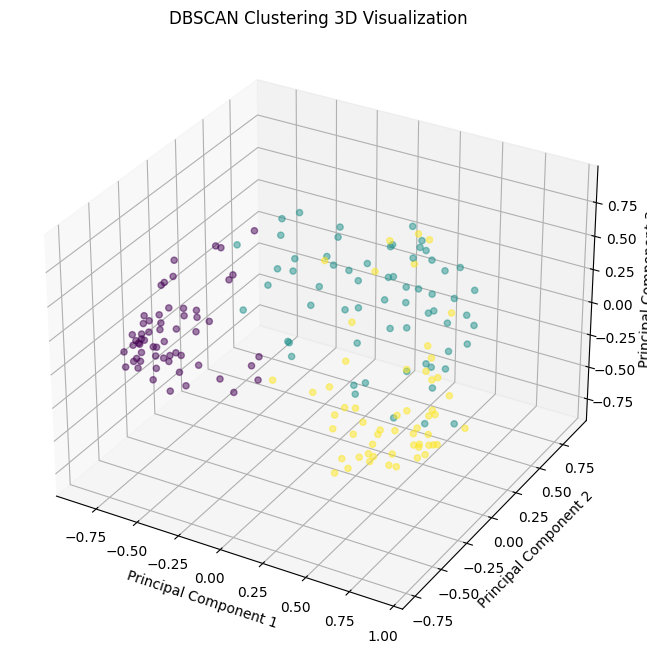

In [9]:
visualization(x, cluster_labels)

In [10]:
interactive_visualization(x, cluster_labels)